# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


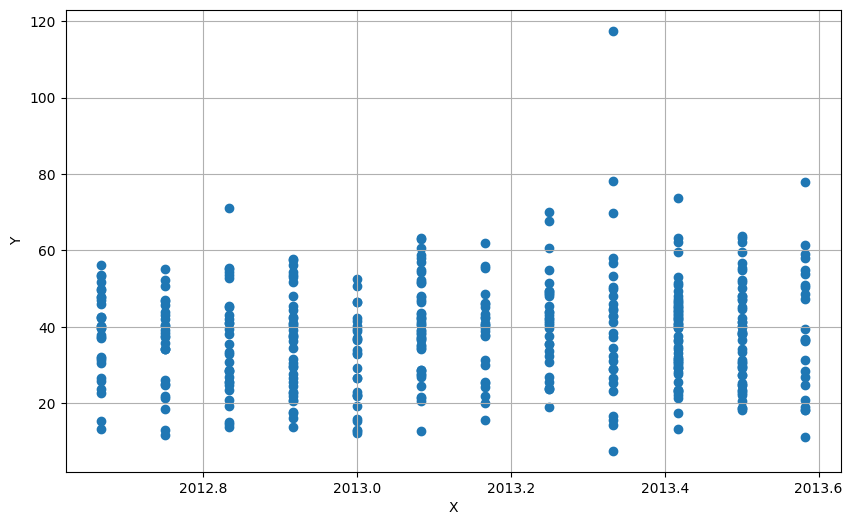

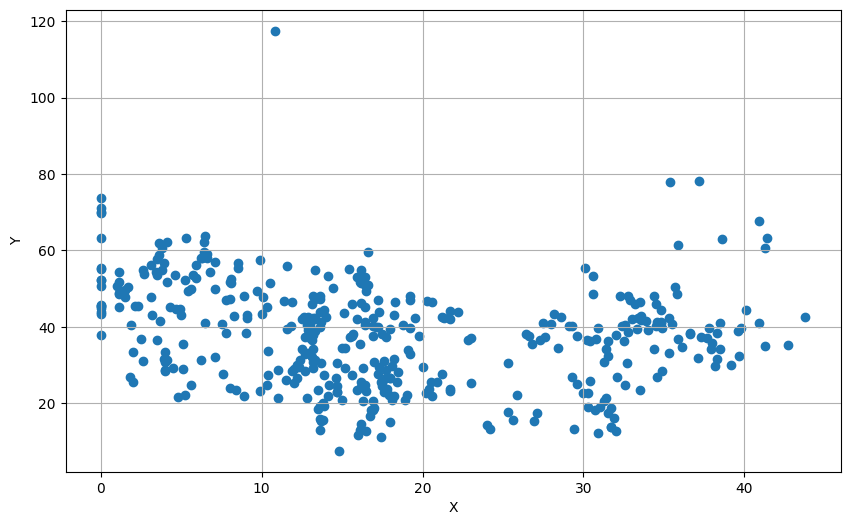

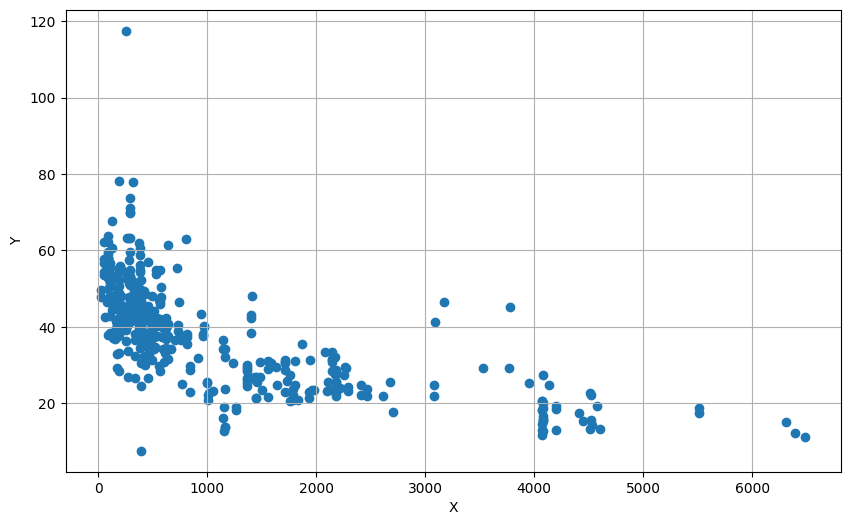

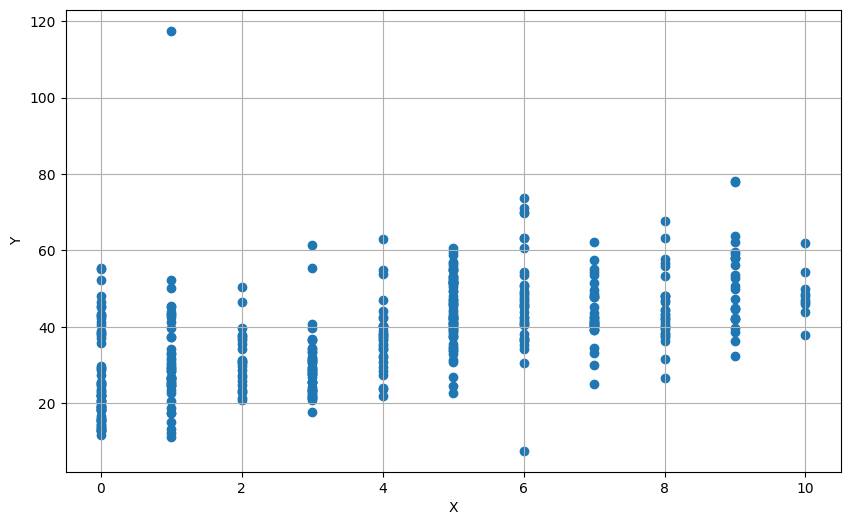

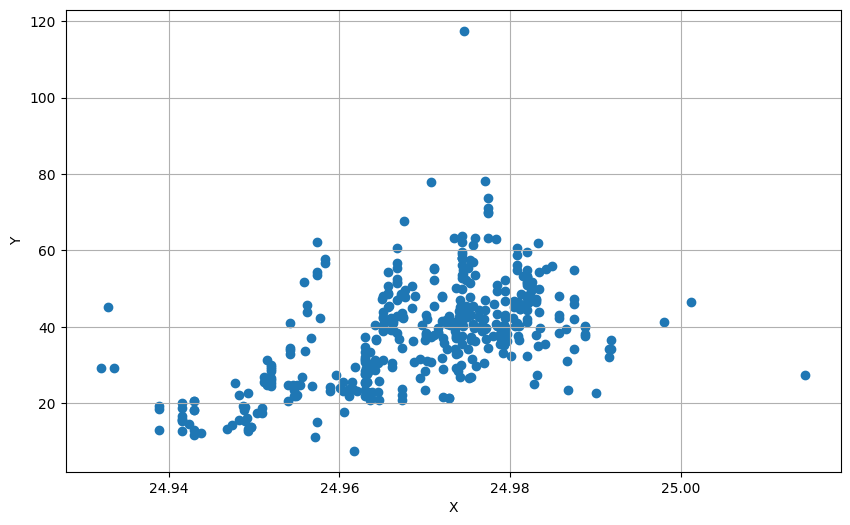

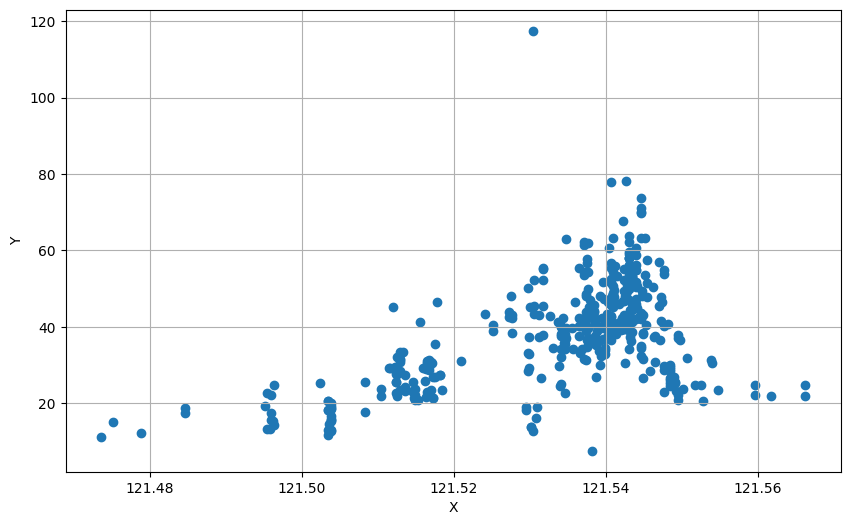

First 5 rows of the scaled X_train:
 [[0.78883495 0.90938865 0.09601874 0.00526701 0.7        0.30014695
  0.67994732]
 [0.99271845 0.         0.13114754 0.01067574 0.9        0.50698016
  0.74569202]
 [0.94660194 1.         0.14519906 0.3050193  0.1        0.22801861
  0.86390078]
 [0.85194175 0.18122271 0.43091335 0.42203966 0.3        0.34900808
  0.36340687]
 [0.31796117 0.54585153 0.62295082 0.07311667 0.5        0.50698016
  0.69663045]]
First 5 rows of the scaled X_test:
 [[0.86650485 0.54585153 0.02576112 0.02709023 0.6        0.40142052
  0.72143563]
 [0.84708738 0.36353712 0.30913349 0.07462448 0.5        0.39456282
  0.68280101]
 [0.90291262 0.45414847 0.         0.03989189 0.1        0.51273573
  0.60838547]
 [0.96601942 0.27292576 0.29742389 0.0233569  0.1        0.49938771
  0.60015366]
 [0.89320388 0.         0.47306792 0.34407516 0.3        0.37092824
  0.40840742]]
Mean Squared Error: 68.07491951569838
R-squared: 0.5708264008601994


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('Real estate.csv')
null_summary = df.isnull().sum()
print(null_summary)

for i in range(1,7):
    first_column = df.iloc[:, i]  # Extract the first column
    second_column = df.iloc[:, 7]  # Extract the second column
    plt.figure(figsize=(10, 6))
    plt.scatter(first_column, second_column)
    plt.xlabel('X') 
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()
    
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("First 5 rows of the scaled X_train:\n", X_train_scaled[:5])
print("First 5 rows of the scaled X_test:\n", X_test_scaled[:5])

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
data = load_breast_cancer()
X=data.data
y=data.target
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

5. Write code for the sigmoid function and Logistic regression.


In [8]:
def sigmoid(z):
    a=1.0/(1.0+ np.exp(-z))
    return a

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)

        for i in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)
            #cross-entropy loss function
            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples
            self.weights -= self.lr* dw
            self.bias-= self.lr* db

    def predict(self, X):
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1   
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom Logistic Regression
custom_lr = LogisticRegression(learning_rate=0.01, epochs=1000)
custom_lr.fit(X_train, y_train)
custom_predictions = custom_lr.predict(X_test)
custom_accuracy = accuracy_score(y_test, custom_predictions)
print("Custom Logistic Regression Accuracy:", custom_accuracy)

# scikit-learn Logistic Regression
sklearn_lr = SklearnLogisticRegression()
sklearn_lr.fit(X_train, y_train)
sklearn_predictions = sklearn_lr.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print("scikit-learn Logistic Regression Accuracy:", sklearn_accuracy)


Custom Logistic Regression Accuracy: 0.3
scikit-learn Logistic Regression Accuracy: 1.0



9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [10]:
from sklearn.metrics import classification_report
report = classification_report(y_test, sklearn_predictions)
print(report)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, sklearn_predictions)
print("Confusion Matrix:\n", conf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('glass.csv')
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00
86,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [17]:
import numpy as np
from collections import Counter
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((float(x1)-float(x2))**2))
    
class KNN(object):
    def __init__(self,k):
        
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]

clf=KNN(k=3)
clf.fit(np.array(x_train),y_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [18]:
predictions=clf.predict(x_test)
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)
print(accuracy(predictions,y_test))

ValueError: could not convert string to float: 'RI'